1. Import some libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Read csv data into the iris variable. 
The columns are given human readable names so that they can be used to annotate figures. The column containing the name of the iris varieties is called 'class' to underscore that the data represents a classification problem.

In [2]:
# Read CSV file to data frame and name the variables
iris = pd.read_csv("iris_data/bezdekIris.data", names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "class"])

3. Examine the dataset.
The dataset consists of 150 observations of 4 variables; sepal length, sepal width, petal length, petal width. These are represented as      columns along with fifth column, called 'class', representing the iris variety.   

In [3]:
# Examine the first 5 rows in the dataset
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The class column contains 3 unique values; Iris-setosa, Iris-versiolor, and Iris-virginica.

In [4]:
# Get an array of unique values in the class column
iris["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

When we group the dataset by class we see that there are 50 observations of each of the 4 variables for each class.

In [5]:
iris.groupby("class").count()

,Sepal Length,Sepal Width,Petal Length,Petal Width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


The dataset is currently in wide format, i.e. observations are in rows and variables are in columns, each row holding observations for a number of variables (ref: https://seaborn.pydata.org/tutorial/data_structure.html). This is a useful format for some applications and it is certainly a good compact and intuitive format for visual examination; however, long format, in which each row contains just a single observation, can be more flexible for plotting as columns can simply be assigned to, for instance, x-axis, y-axis, colour, etc. There are cases where one is more convenient than the other and both are used here.

The pandas DataFrame.melt() method transforms a wide-form dataframe to a long form one by placing all of the values in one column and adding columns for the grouping variables (ref: https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.melt.html).

In [6]:
iris_long = iris.melt(value_vars=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"], id_vars="class")
iris_long.head()

,class,variable,value
0,Iris-setosa,Sepal Length,5.1
1,Iris-setosa,Sepal Length,4.9
2,Iris-setosa,Sepal Length,4.7
3,Iris-setosa,Sepal Length,4.6
4,Iris-setosa,Sepal Length,5.0


In [7]:
iris.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.117570,0.871754,0.817941
Sepal Width,-0.117570,1.000000,-0.428440,-0.366126
Petal Length,0.871754,-0.428440,1.000000,0.962865
Petal Width,0.817941,-0.366126,0.962865,1.000000


In [8]:
iris.cov()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,0.685694,-0.042434,1.274315,0.516271
Sepal Width,-0.042434,0.189979,-0.329656,-0.121639
Petal Length,1.274315,-0.329656,3.116278,1.295609
Petal Width,0.516271,-0.121639,1.295609,0.581006


Histograms offer an easily interpreted 

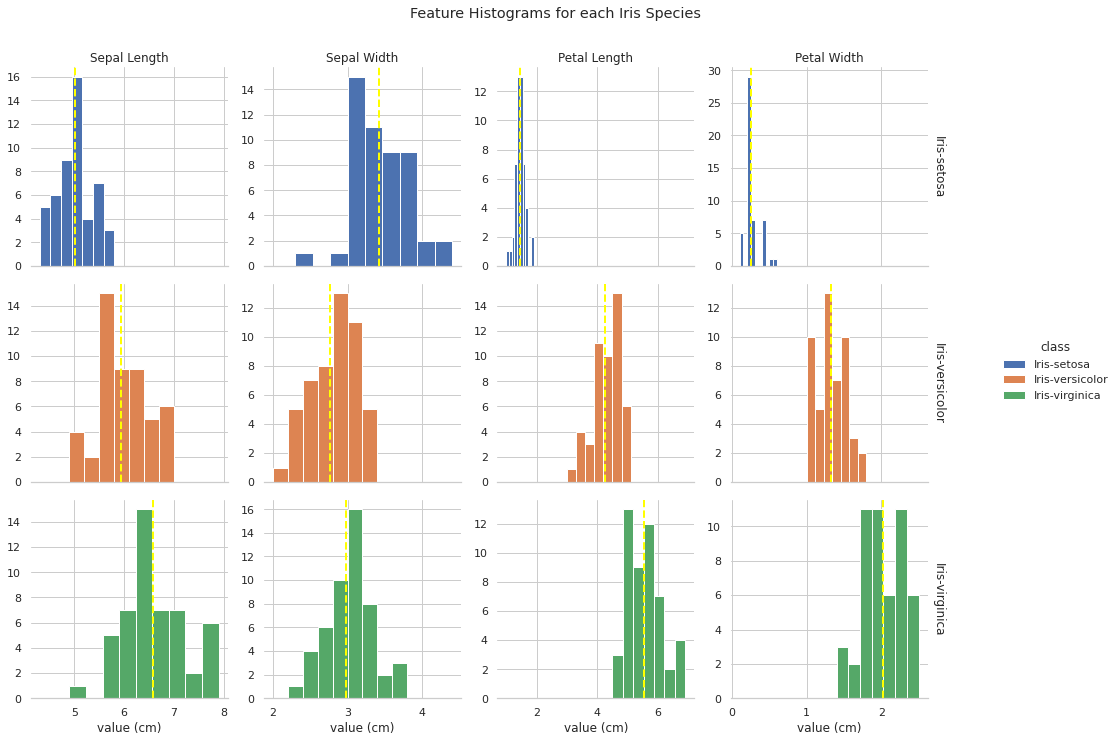

In [158]:
sns.set_theme(style="whitegrid")
g = sns.displot(data=iris_long, 
            x="value", 
            row="class",
            hue="class",
            col="variable", 
            kind="hist",
            kde=False, 
            common_bins=False,
            #    bins=40,
            height=3.5, 
            aspect=1, 
            alpha=1, 
            linewidth=1,
            facet_kws=dict(
                sharex="col", 
                sharey=False,
                margin_titles=True
            )
           )

def vml(x, **kwargs):
    plt.axvline(np.mean(x), linestyle = '--', color = 'yellow', linewidth=2, label="mean=" + str(np.mean(x)))

g.map(vml, "value")
g.set_axis_labels("value (cm)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.despine(left=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Feature Histograms for each Iris Species")
#g.savefig("delme_hist.png")

Text(0.5, 0.98, 'Stacked Feature Histograms for each Iris Species')

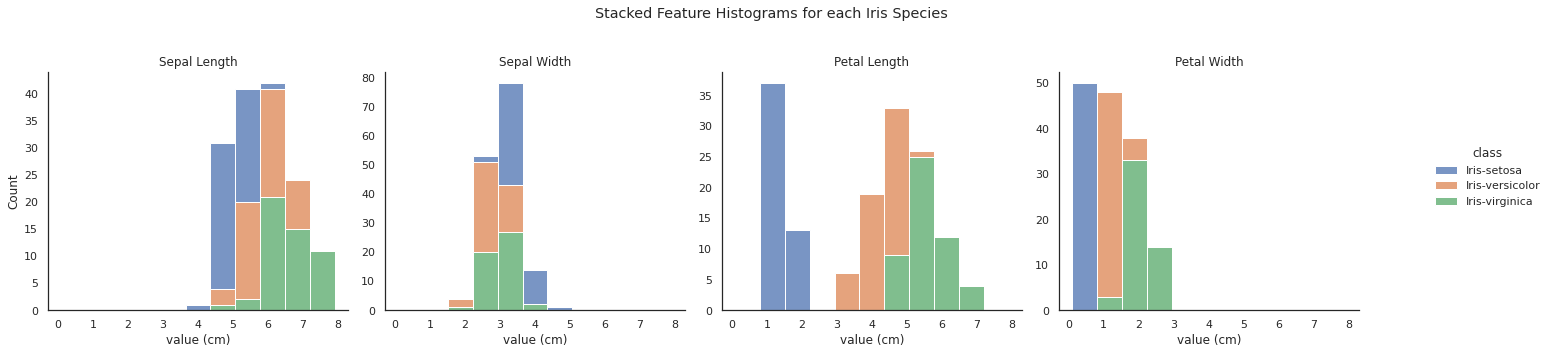

In [166]:
sns.set_theme(style="white")
h = sns.displot(data=iris_long, 
                x="value", 
                col="variable", 
                multiple="stack", 
                kind="hist", 
                hue="class",
                common_bins=True,
                #bins=20,
                facet_kws=dict(
                    sharex=False, 
                    sharey=False,
                    margin_titles=True
                )
               )
h.set_axis_labels("value (cm)")
h.set_titles(col_template="{col_name}", row_template="{row_name}")
h.fig.subplots_adjust(top=0.8)
h.fig.suptitle("Stacked Feature Histograms for each Iris Species")

#sns.despine(left=True)

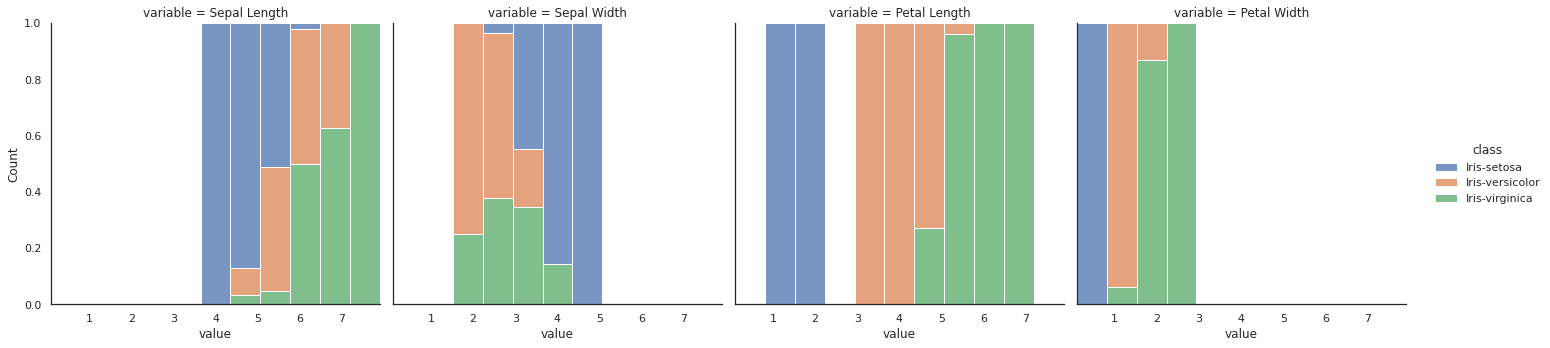

In [11]:
sns.displot(data=iris_long, x="value", hue="class", col="variable", kind="hist", multiple="fill")

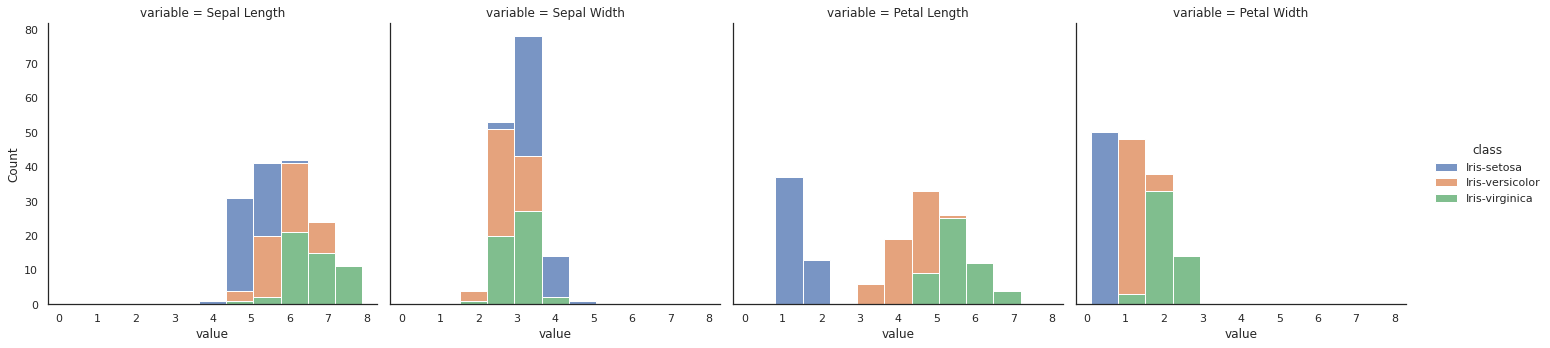

In [12]:
sns.displot(data=iris_long, x="value", hue="class", col="variable",  kind="hist", multiple="stack")

This tells us that sepal dimensions are unlikely to be 

Text(0.5, 0.98, 'Stacked Feature Histograms for each Iris Species')

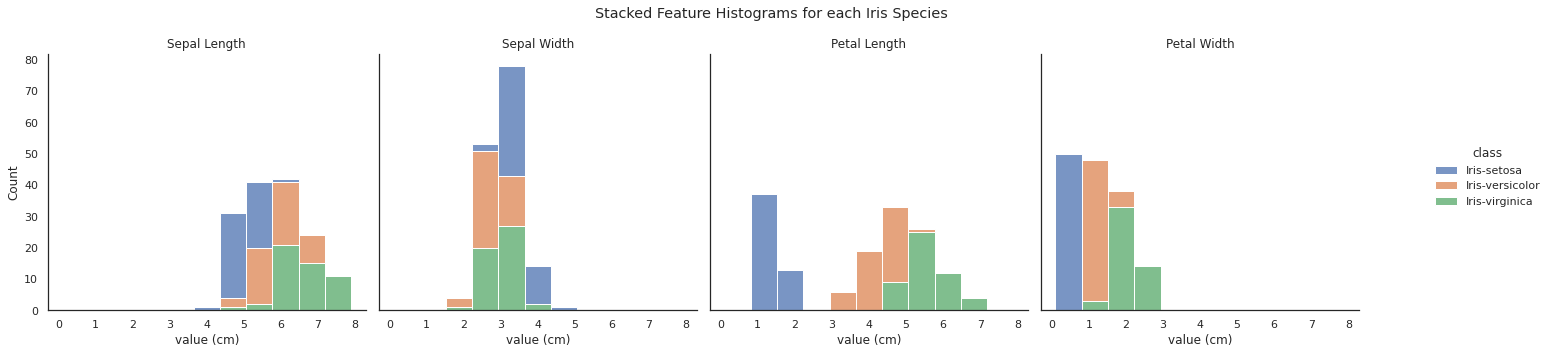

In [173]:
sns.set_theme(style="white")
h = sns.displot(data=iris_long, 
            x="value", 
            #row="class",
            multiple="stack",
            hue="class",
            col="variable", 
            kind="hist", 
            kde=False, 
            common_bins=True, 
            facet_kws=dict(sharex=False, 
                           sharey=True,
                           margin_titles=True)
           )

h.set_axis_labels("value (cm)")
h.set_titles(col_template="{col_name}", row_template="{row_name}")
h.fig.subplots_adjust(top=0.85)
h.fig.suptitle("Stacked Feature Histograms for each Iris Species")


In [14]:
iris_long.head()

,class,variable,value
0,Iris-setosa,Sepal Length,5.1
1,Iris-setosa,Sepal Length,4.9
2,Iris-setosa,Sepal Length,4.7
3,Iris-setosa,Sepal Length,4.6
4,Iris-setosa,Sepal Length,5.0


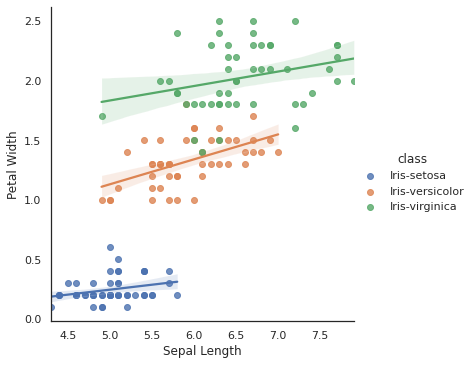

In [15]:
sns.lmplot(data=iris, x="Sepal Length", y="Petal Width", hue="class")

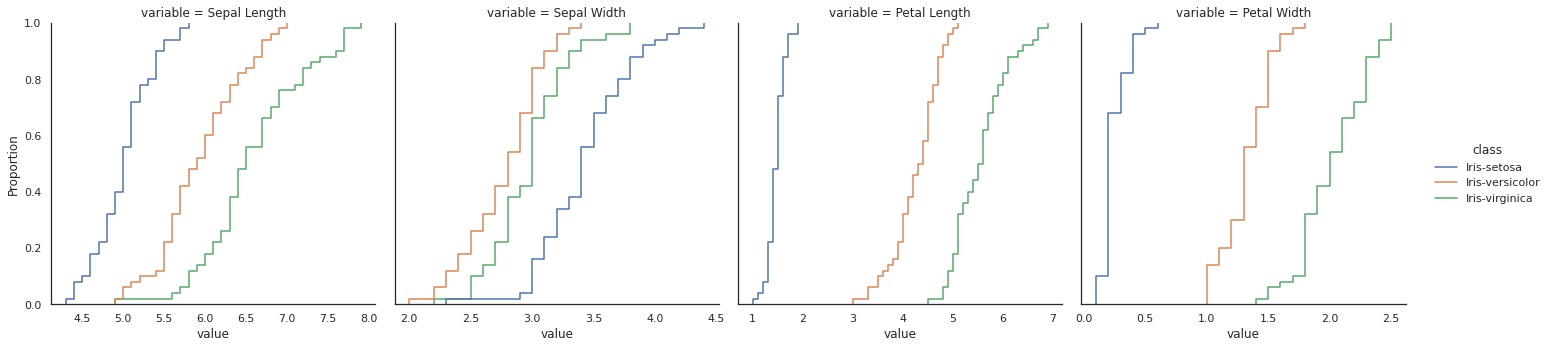

In [16]:
sns.displot(data=iris_long, x="value", col="variable", hue="class", kind="ecdf", facet_kws=dict(sharex=False))

<AxesSubplot:xlabel='value', ylabel='variable'>

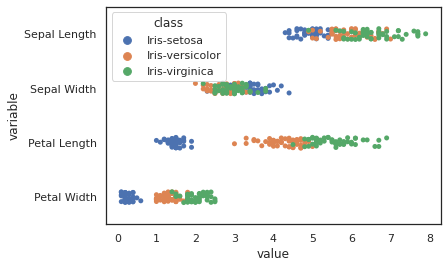

In [17]:
sns.stripplot(data=iris_long, y="variable", x="value", hue="class", jitter=True, dodge=False)

/home/fod/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/fod/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/fod/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/fod/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='value', ylabel='variable'>

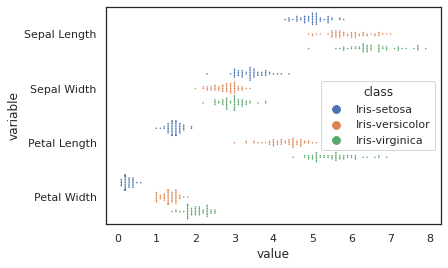

In [18]:
sns.swarmplot(data=iris_long, x="value", y="variable", hue="class", dodge=True, size=1.5)

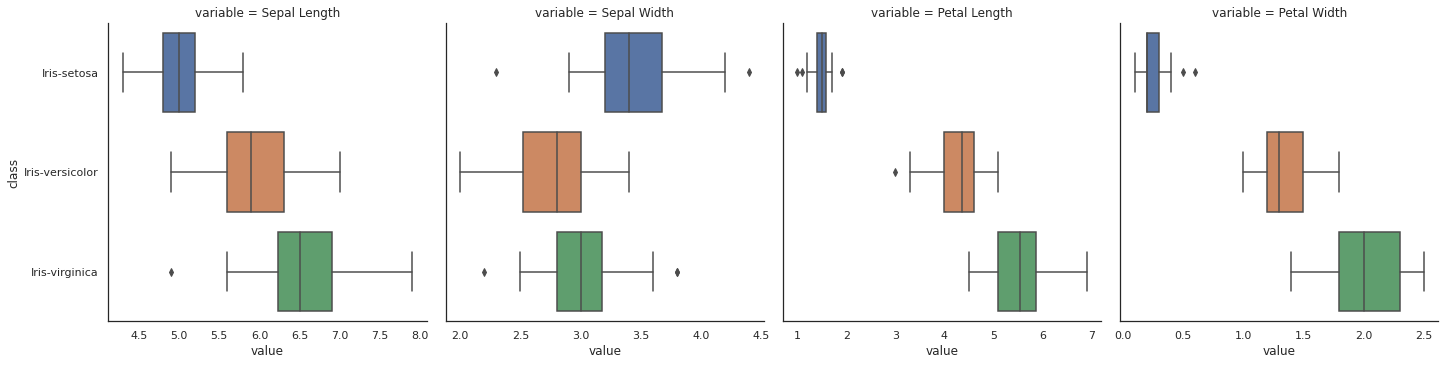

In [19]:
sns.catplot(data=iris_long, x="value", y="class", col="variable", kind="box", sharex=False)

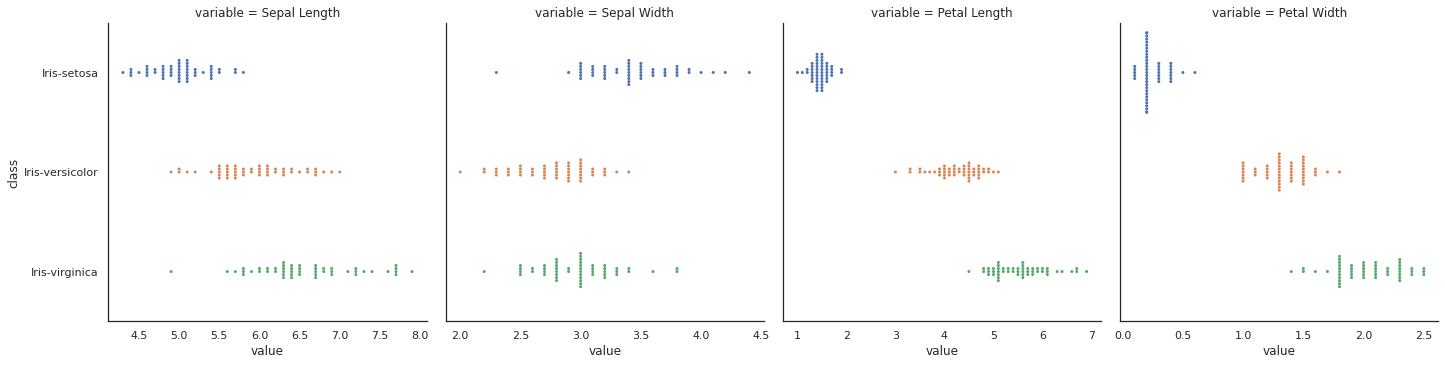

In [20]:
sns.catplot(data=iris_long, x="value", y="class", col="variable", kind="swarm", sharex=False, s=3)

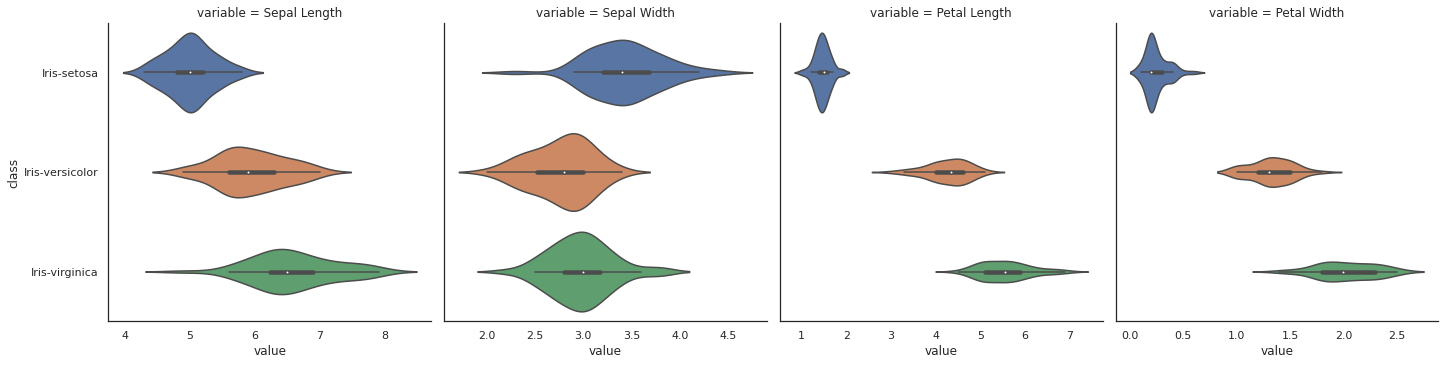

In [21]:
sns.catplot(data=iris_long, x="value", y="class", col="variable", kind="violin", sharex=False, s=3)

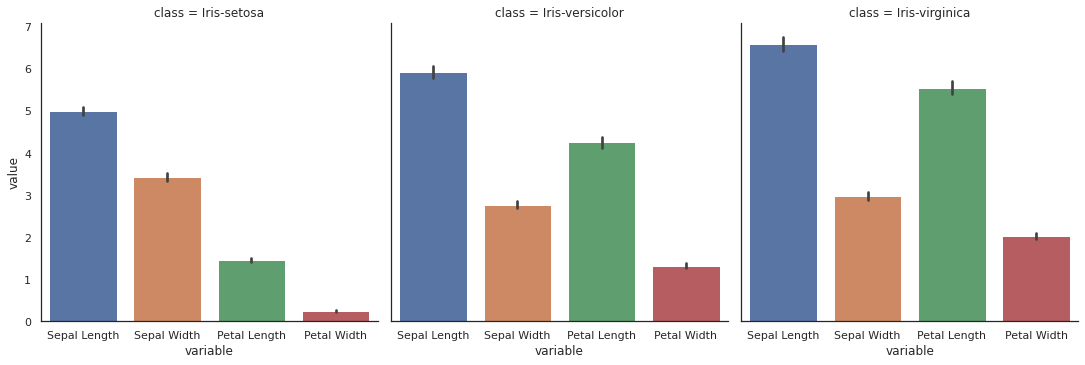

In [22]:
sns.catplot(data=iris_long, x="variable", y="value", col="class", kind="bar", sharex=True)

<AxesSubplot:xlabel='variable', ylabel='value'>

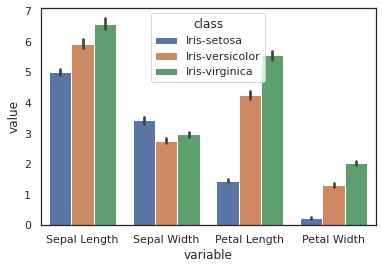

In [23]:
sns.barplot(data=iris_long, x="variable", y="value", hue="class")

<AxesSubplot:xlabel='value', ylabel='variable'>

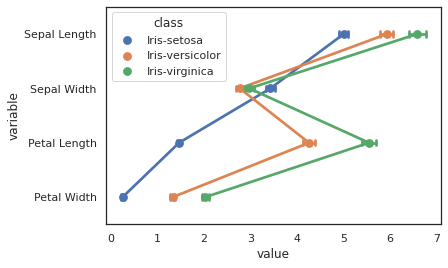

In [24]:
sns.pointplot(data=iris_long, x="value", y="variable", hue="class", capsize=0.1)

<AxesSubplot:xlabel='Sepal Width', ylabel='Petal Width'>

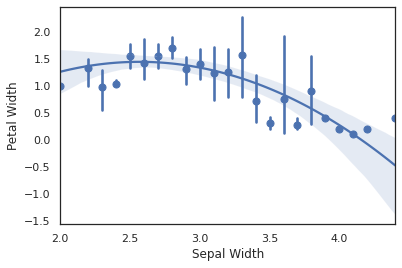

In [25]:
sns.regplot(data=iris, x="Sepal Width", y="Petal Width", x_estimator=np.mean, order=2)

<AxesSubplot:xlabel='Sepal Width', ylabel='Petal Width'>

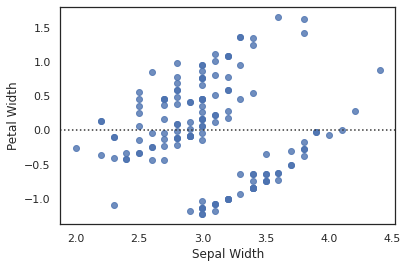

In [26]:
sns.residplot(data=iris, x="Sepal Width", y="Petal Width", order=2)

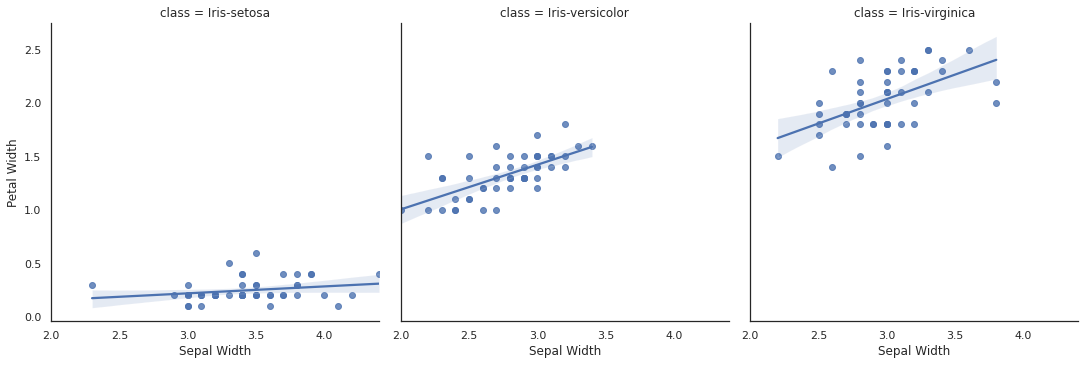

In [27]:
sns.lmplot(data=iris, x="Sepal Width", y="Petal Width", col="class")

This heatmap shows a weak negative correlation between sepal width and both peatl length and petal width. Perhaps surprisingly, there appears to be a strong positive correlation between sepal length and both petal length and petal width. Also surprising is that sepal width and length do not appear to be correlated. It is difficult to see how knowledge of these relationships might aid cassification of iris species but the ease with which pairs of potentially meaningfully related variables can be identified using this simple visualisation is impressive.

<AxesSubplot:>

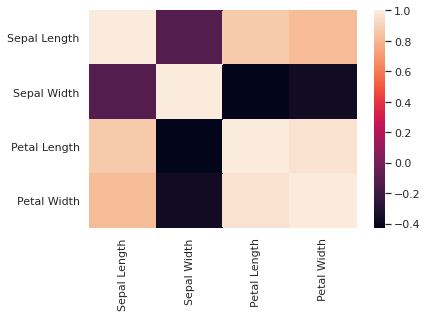

In [28]:
sns.heatmap(iris.corr())

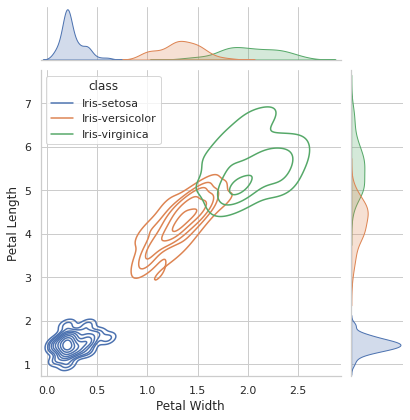

In [29]:
sns.set_style("whitegrid")
sns.jointplot(data=iris, x="Petal Width", y="Petal Length", hue="class", kind="scatter", marginal_kws=dict(), marker="").plot_joint(sns.kdeplot)


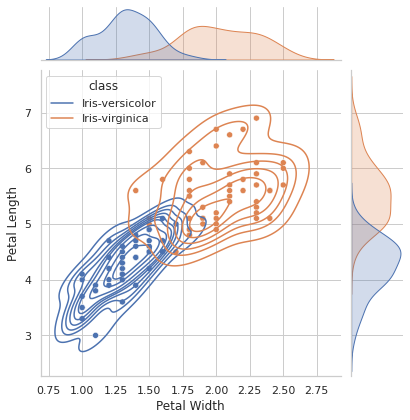

In [155]:
iris_sub = iris[iris["class"].isin(["Iris-virginica", "Iris-versicolor"])]
sns.jointplot(data=iris_sub, x="Petal Width", y="Petal Length", hue="class", kind="scatter", marginal_kws=dict(), marker="o").plot_joint(sns.kdeplot)


In [31]:
iris[iris["class"].isin(["Iris-virginica", "Iris-versicolor"])]

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


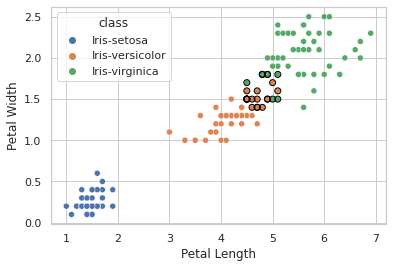

In [154]:
sns.set_style("whitegrid")
iris["Sepal Area"] = iris["Sepal Length"] * iris["Sepal Width"]
iris["Petal Area"] = iris["Petal Length"] * iris["Petal Width"]
iris_rule = iris[(iris["Petal Length"] >= 4.5) & (iris["Petal Length"] <= 5.1) & (iris["Petal Width"] >= 1.4) & (iris["Petal Width"] <= 1.8)]
sns.scatterplot(data=iris, x="Petal Length", y="Petal Width", hue="class")
plt.scatter(x=iris_rule["Petal Length"], y=iris_rule["Petal Width"], facecolors='none', edgecolors='black')

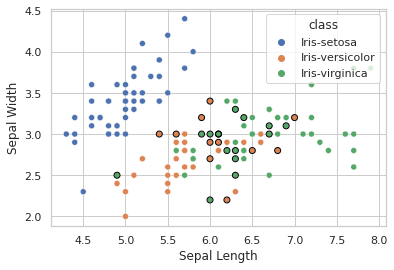

In [141]:
sns.scatterplot(data=iris, x="Sepal Length", y="Sepal Width", hue="class")
plt.scatter(x=iris_rule["Sepal Length"], y=iris_rule["Sepal Width"], facecolors='none', edgecolors='black')

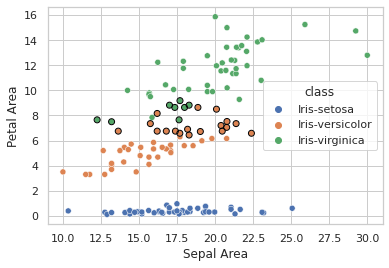

In [144]:
sns.scatterplot(data=iris, x="Sepal Area", y="Petal Area", hue="class")
plt.scatter(x=iris_rule["Sepal Area"], y=iris_rule["Petal Area"], facecolors='none', edgecolors='black')

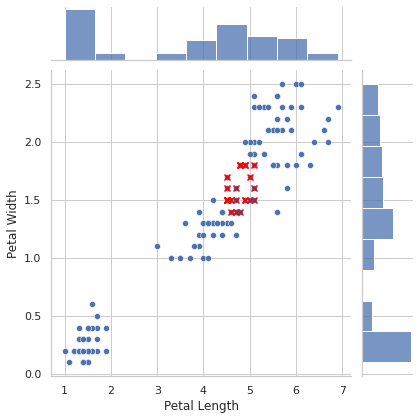

In [109]:
j = sns.jointplot(data=iris, x="Petal Length", y="Petal Width")
j.x = iris_rule["Petal Length"]
j.y = iris_rule["Petal Width"]
#graph.plot_joint(plt.scatter, marker='x', c='b', s=50)
j.plot_joint(plt.scatter, marker="x", color="red")

In [157]:
iris.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Sepal Area,Petal Area
Sepal Length,1.000000,-0.117570,0.871754,0.817941,0.679180,0.857300
Sepal Width,-0.117570,1.000000,-0.428440,-0.366126,0.643461,-0.288431
Petal Length,0.871754,-0.428440,1.000000,0.962865,0.360909,0.958422
Petal Width,0.817941,-0.366126,0.962865,1.000000,0.368845,0.980333
Sepal Area,0.679180,0.643461,0.360909,0.368845,1.000000,0.454503
Petal Area,0.857300,-0.288431,0.958422,0.980333,0.454503,1.000000


In [34]:
type(iris.describe())

pandas.core.frame.DataFrame